## 머신러닝
# 선형 서포트벡터 머신 (Linear SVM)

- 선형 SVM 은 클래스를 구분하는 분류 문제에서, 각 클래스를 잘 구분하는 직선을 그어주는 방식이다.
- 아래의 그림들을 보면 선형 SVM 이 직관적이라는 것을 알 수 있다. 두 클래스의 가운데 선을 그어주게 된다. 가장 가까이 있는 점들과의 거리가 가장 큰 직선을 찾는다.
- 이때 가장 가까이 있는 점들을 **Support Vector** 라고 하고, 찾은 직선과 서포트벡터 사이의 거리를 **최대 마진(margin)** 이라 한다.
- 결국 마진을 최대로 하는 서포트벡터와 직선을 찾는 것이 목표이다.
- 선형이 아닌 일반적인 SVM 에 대해서는 별도로 다룬다.
- 참고 자료 : https://en.wikipedia.org/wiki/Support_vector_machine

<img src="ch02_07.jpg">
<p style="text-align: center;">(출처 : https://en.wikipedia.org/wiki/Support_vector_machine)</p>
<img src="ch02_08.png">
<p style="text-align: center;">(출처 : http://scikit-learn.org/stable/modules/svm.html)</p>

### 속성 2개, 클래스 2개인 경우
- 아래에서, Iris 데이터에 선형 SVM 을 적용해 보겠다.
- 선형 SVM 은 직선(또는 평면)으로 클래스를 구분한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
col1 = 0
col2 = 1

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정 (petal length & petal width)

y = iris.target.copy()
y[y==2] = 1 # 타겟값을 setosa(0), others(1) 로 설정
# y = np.where(iris.target==2, 1, iris.target)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 2), (38, 2), (112,), (38,))

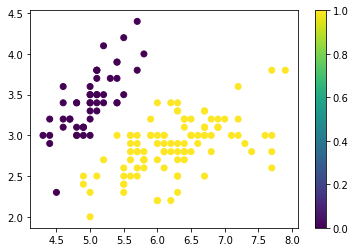

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.colorbar()

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

In [6]:
score = model.score(X_train, y_train)
print(score)

0.9910714285714286


In [7]:
score = model.score(X_test, y_test)
print(score)

1.0


- 선형 SVM 도 직선을 찾는 것이므로 기울기(가중치)와 절편 값을 결과로 알려준다.

In [8]:
display(model.coef_, model.intercept_)

array([[ 1.45531399, -2.15395916]])

array([-1.12502458])

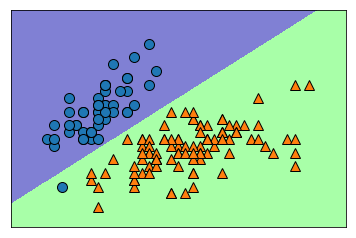

In [9]:
import mglearn

mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

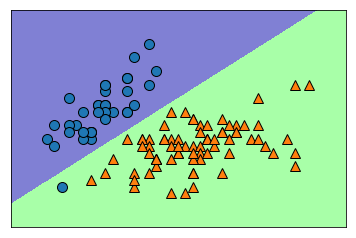

In [10]:
import mglearn

mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

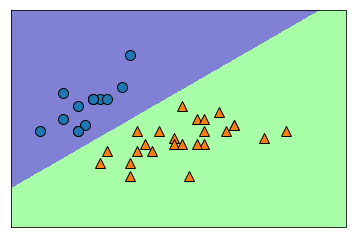

In [12]:
import mglearn

mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

### 옵션 C
- C 가 클수록 칼 같이 자른다
- C 가 작을 수록 대강 자른다

In [13]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm.classes:

class LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : string, 'l1' or 'l2' (default='l2')
 |      Specifies the norm used in the penalization. The 'l2'
 |      penalty is the standard used in SVC. The 'l1' leads to ``coef_``
 |      vectors that are sparse.
 |  
 |  loss : string, 'hinge' or 'squared_hinge' (defau

In [11]:
model = LinearSVC(C=1000)
model.fit(X_train, y_train)

LinearSVC(C=1000, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

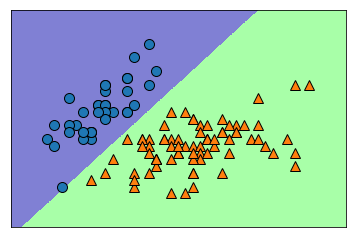

In [12]:
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

In [17]:
model = LinearSVC(C=0.01)
model.fit(X_train, y_train)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

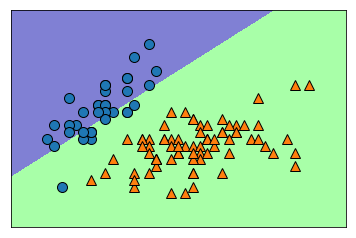

In [18]:
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

In [30]:
w = model.coef_
b = model.intercept_

display(w, b)

array([[ 0.33261471, -0.49728681]])

array([-0.06263829])

### 로지스틱회귀와 비교

In [31]:
svc = LinearSVC(C=1)
svc.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1)
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0.5,1,'LogisticRegression')

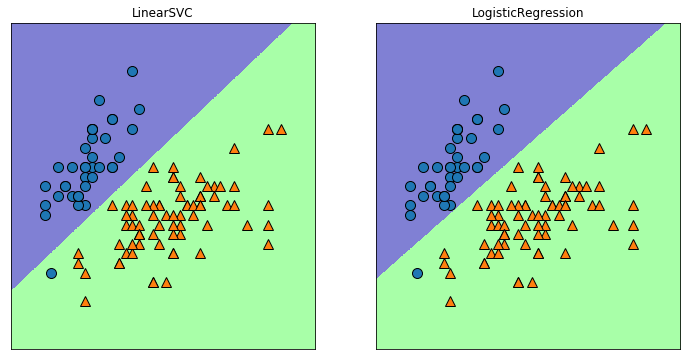

In [33]:
plt.figure(figsize=[12,6])

plt.subplot(1,2,1)
mglearn.plots.plot_2d_classification(svc, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.title('LinearSVC')

plt.subplot(1,2,2)
mglearn.plots.plot_2d_classification(lr, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.title('LogisticRegression')

In [34]:
svc.coef_, svc.intercept_

(array([[ 1.42658594, -2.12980911]]), array([-1.0790892]))

In [35]:
svc.coef_[0,0]/svc.coef_[0,1]

-0.6698186895736228

In [36]:
lr.coef_, lr.intercept_

(array([[ 2.24483645, -3.60800819]]), array([-0.71539826]))

In [37]:
lr.coef_[0,0]/lr.coef_[0,1]

-0.622181640469536

### 결과 평가

- 선형 SVM 은 평면으로 클래스를 구분하므로 기울기와 편향값을 제공한다.
- 하지만 확률수치를 알 수 있는 model.predict_proba() 는 제공하지 않지만, decision_function() 을 제공한다.
- LinearSVC 는 C 라는 중요한 옵션을 가진다. C 값이 클수록 모델이 훈련데이터에 과대적합 되는 경향이 생긴다.

In [7]:
help(LinearSVC)

Help on class LinearSVC in module sklearn.svm.classes:

class LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  LinearSVC(penalty='l2', loss='squared_hinge', dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : string, 'l1' or 'l2' (default='l2')
 |      Specifie

- 테스트 데이터에 적용해 보자.

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C=1)
model.fit(X_train, y_train)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [39]:
model.score(X_test, y_test)

1.0

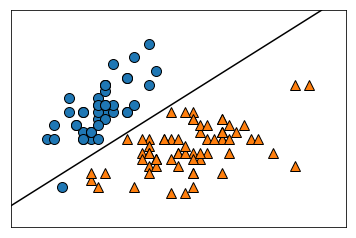

In [40]:
mglearn.plots.plot_2d_separator(model, X_train, eps=0.5)
#mglearn.plots.plot_2d_classification(model, X_train, eps=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

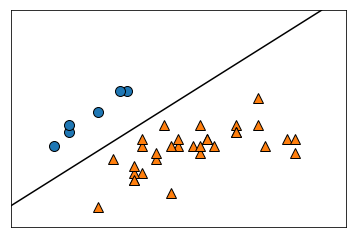

In [41]:
mglearn.plots.plot_2d_separator(model, X_train, eps=0.5)
#mglearn.plots.plot_2d_classification(model, X_train, eps=0.5)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test)

In [44]:
pred_y = model.predict(X_train)

display(y_train, pred_y)

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [45]:
X_train[y_train!=pred_y]

array([[4.5, 2.3]])

In [46]:
pred_y[y_train!=pred_y]

array([1])

In [47]:
np.where(y_train!=pred_y)

(array([54], dtype=int64),)

In [48]:
X_train[54]

array([4.5, 2.3])

In [8]:
help(model.decision_function)

Help on method decision_function in module sklearn.linear_model.base:

decision_function(X) method of sklearn.svm.classes.LinearSVC instance
    Predict confidence scores for samples.
    
    The confidence score for a sample is the signed distance of that
    sample to the hyperplane.
    
    Parameters
    ----------
    X : {array-like, sparse matrix}, shape = (n_samples, n_features)
        Samples.
    
    Returns
    -------
    array, shape=(n_samples,) if n_classes == 2 else (n_samples, n_classes)
        Confidence scores per (sample, class) combination. In the binary
        case, confidence score for self.classes_[1] where >0 means this
        class would be predicted.



In [49]:
model.classes_

array([0, 1])

In [50]:
y_train

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1])

In [51]:
model.decision_function(X_train) # 경계면에서의 샘플까지 거리

array([-1.48097169, -0.68085413,  1.90720766, -2.27609392,  1.97358793,
       -2.2910799 ,  1.52535304,  0.93936228, -1.55734261,  1.46896342,
        0.64886456,  2.2027007 ,  1.85081803,  1.88722636,  2.12632978,
       -0.53310761,  2.63095429, -1.41958674, -0.89997625, -0.67086348,
       -1.11410305,  0.87797733, -1.71008446,  1.67809489, -1.99059153,
       -1.55734261,  3.22194038,  2.14631107, -0.75222973,  1.67809489,
       -1.04272745,  2.12632978, -0.67086348,  1.45397744,  0.85799603,
        1.67309956, -0.96635653, -2.41884512, -1.99059153,  0.86798668,
        2.1313251 ,  0.78162511,  0.205625  , -1.70009381, -1.1041124 ,
        1.46896342, -1.26184957, -0.75222973,  2.26908097, -0.89498093,
        1.45397744, -2.50021137,  1.82584141,  3.59879967,  0.40976114,
        0.65885521,  1.74447516, -1.2668449 , -1.48097169, -1.76647409,
        2.34045657, -1.39461012,  1.09210412,  1.23985065,  1.14849375,
        1.83083673,  2.19271005,  2.71731586,  2.63095429, -1.77

In [52]:
model.decision_function(X_train)[54]

0.40976114123062346

In [53]:
np.abs(model.decision_function(X_test)).mean()

1.7517785848935552

### 모든 속성과 모든 품종 사용
- 품종이 3개이므로, 다중분류이다
- 일대다 방식으로 3개의 서브모델이 생성된다

In [19]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C=1)
model.fit(X_train, y_train)

score1 = model.score(X_train, y_train)
score2 = model.score(X_test, y_test)
print(score1, score2)

0.9732142857142857 1.0


In [20]:
model.coef_

array([[ 0.08240157,  0.54855878, -0.69723433, -0.47749819],
       [ 0.05897156, -0.83069698,  0.37621848, -0.86621772],
       [-0.64848948, -1.30895031,  1.27066605,  1.72912297]])

In [21]:
model.intercept_

array([ 0.06418373,  1.44571037, -1.32512073])

In [23]:
pred_y = model.predict(X_train)
pred_y

array([1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2,
       1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 0])

In [24]:
y_train

array([1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 2,
       1, 2, 1, 0, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0,
       2, 2, 0, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2,
       2, 0])

In [26]:
idx = np.where(y_train!=pred_y)
idx

(array([ 22,  39, 106], dtype=int64),)

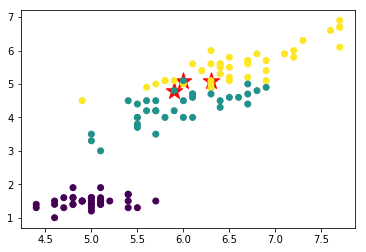

In [31]:
plt.scatter(X_train[idx][:,0], X_train[idx][:,2],
            c='r', s=300, marker='*', vmin=0, vmax=2)
plt.scatter(X_train[:,0], X_train[:,2], c=y_train)

In [70]:
model.decision_function(X_test)

array([[-1.82894105,  0.08920273, -0.8052668 ],
       [ 1.03488089, -0.45299412, -5.90199233],
       [-1.29364274, -0.03257786, -1.54452647],
       [ 0.91378371, -0.73435508, -5.74028581],
       [-1.78907754,  0.17509201, -0.54987999],
       [-2.624116  , -0.0578434 ,  1.00062412],
       [-2.39747822,  0.05145519,  0.54733739],
       [-2.67283698, -0.372246  ,  0.96649452],
       [-2.44310679, -0.3983273 ,  0.62549795],
       [-1.88010273, -0.10990982, -0.59620771],
       [-2.12372928, -0.39777599,  0.13747185],
       [-1.87347413,  0.01668282, -0.8629484 ],
       [-2.45871771, -0.31852565,  1.09924804],
       [-2.38008224, -0.32377817,  0.61039179],
       [-1.58310577, -0.35278429, -1.57948621],
       [ 1.02017532, -1.06286602, -6.17973978],
       [-2.58628204, -0.21023352,  0.70717483],
       [ 1.38466709, -1.10820201, -6.87247702],
       [-1.5102897 , -0.18870502, -1.13117131],
       [-2.27811571, -0.10520861,  0.38067464],
       [-1.4745271 , -0.12700156, -1.155

### 두 속성과 모든 품종 사용

In [45]:
col1 = 0
col2 = 1

X = iris.data[:,[col1,col2]] # 시각화를 위해 속성 2개만 선정 (sepal width & petal width)
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearSVC(C=100)
model.fit(X_train, y_train)

score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print(score_train, score_test)

0.7767857142857143 0.7894736842105263


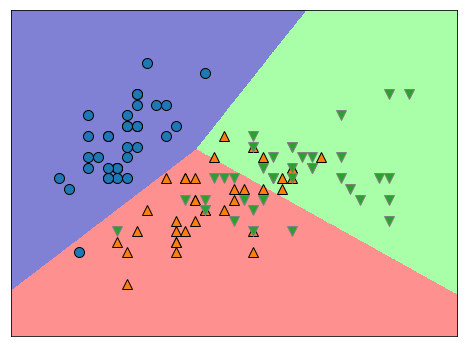

In [46]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

In [47]:
w = model.coef_
b = model.intercept_

display(w,b)

array([[-3.12932824,  3.2447848 ],
       [ 0.05689194, -1.28243418],
       [ 0.69259221, -0.04389457]])

array([ 6.24783587,  2.88372677, -4.79578786])

In [59]:
X.max(axis=0), X.min(axis=0)

(array([7.9, 4.4]), array([4.3, 2. ]))

In [49]:
X[:5]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

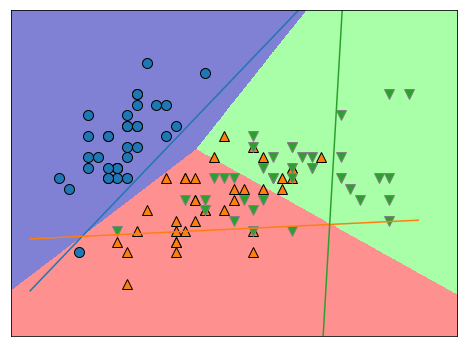

In [57]:
plt.figure(figsize=[8,6])
mglearn.plots.plot_2d_classification(model, X_train, eps=0.5, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

plt.plot([4, 8], [-w[0,0]/w[0,1]*4-b[0]/w[0,1], -w[0,0]/w[0,1]*8-b[0]/w[0,1]])
plt.plot([4, 8], [-w[1,0]/w[1,1]*4-b[1]/w[1,1], -w[1,0]/w[1,1]*8-b[1]/w[1,1]])
plt.plot([4, 8], [-w[2,0]/w[2,1]*4-b[2]/w[2,1], -w[2,0]/w[2,1]*8-b[2]/w[2,1]])

### C 값 변경

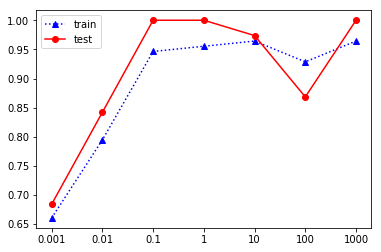

In [61]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

score1 = []
score2 = []
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for C in Cs:
    model = LinearSVC(C=C)
    model.fit(X_train, y_train)
    s1 = model.score(X_train, y_train)
    s2 = model.score(X_test, y_test)
    score1.append(s1)
    score2.append(s2)
    
plt.plot(score1, 'b^:')
plt.plot(score2, 'ro-')
plt.legend(['train','test'])
plt.xticks(range(len(Cs)), Cs)
pass

### 비용함수
- hard-margin 과 soft-margin 설명 (https://en.wikipedia.org/wiki/Support_vector_machine)